[View in Colaboratory](https://colab.research.google.com/github/uyathiraj/Call-log-analyzer/blob/master/call_log_analysis.ipynb)

In [0]:
import pandas as pd

In [0]:
!pip install wordcloud

In [2]:
from google.colab import files
uploaded = files.upload()

for file in uploaded.keys():
  print("file uploaded ",file)



Saving call_logs.json to call_logs.json
file uploaded  call_logs.json


In [0]:
with open('calls.json','w') as f:
  f.write(uploaded['call_logs.json'].decode('utf-8'))
  

In [0]:
with open('calls.json', 'r') as myfile:
    data=myfile.read().replace('\n', '')

In [0]:
import json
json_data = json.loads(data)
#print(json_data)

In [0]:
call_logs = json_data['call_logs']


In [0]:
cols = ['number','call_type','start_timestamp','duration','contact_name']
df_data = pd.DataFrame(columns = cols)


In [0]:
import datetime

i=0
for k in call_logs:
  lst = call_logs[k]
  for item in lst:
    item['number'] = k
    item['start_timestamp'] = datetime.datetime.fromtimestamp(int(item['start_timestamp'])).strftime('%Y-%m-%d %H:%M:%S')
    
    df_data.loc[i] = pd.Series(item)
    i=i+1
    

In [0]:
def find_frequency_df(df_data,col,newcols='count'):
  df_freq = pd.DataFrame({newcols : df_data.groupby(col).size()}).reset_index()
  print(len(df_freq))
  return df_freq
  

In [0]:
from IPython.display import HTML,display
def display_text(text):
  display(HTML('<h2>'+text+'</h2>'))

In [0]:
import matplotlib.pyplot as plt
import numpy as np
def plot_bar_chart(total_items, y_values, x_values, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(18,10))
    plt.bar(np.arange(total_items), y_values,color=['violet','indigo','blue','green', 'yellow', 'orange','red' ])
    plt.xticks(np.arange(total_items),x_values,rotation=rotation)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [0]:
def plot_pie_chart(labels,sizes,title):
  #labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
  #sizes = [15, 30, 45, 10]
  #explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, labeldistance=1.1,autopct='%1.1f%%',
        shadow=True, startangle=90)
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title(title,y=1.08)
  #plt.title(figure_title, y=1.08)
  plt.show()

In [0]:
df_cleaned = df_data.dropna()
#print("Length :",len(df_cleaned))


In [0]:
def update_user(df_temp):
  df_temp.loc[:,'contact_name'] = [('user'+str(i)) for i in range(0,len(df_temp))]

In [15]:
df_num = find_frequency_df(df_cleaned,'contact_name','num_count')#
update_user(df_num)

58


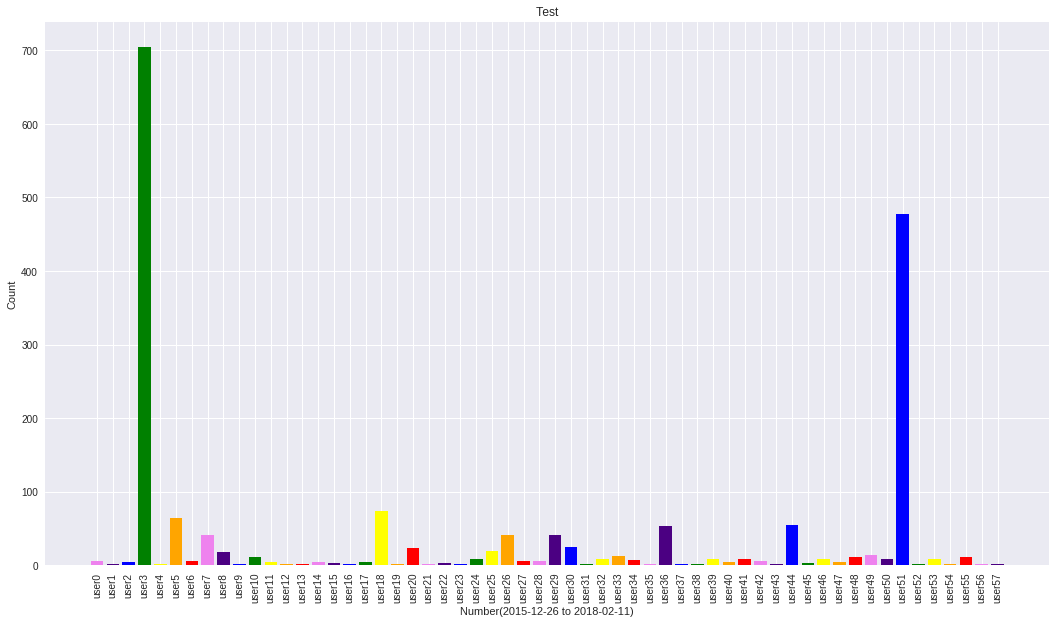

In [16]:
plot_bar_chart(len(df_num),df_num['num_count'],df_num['contact_name'],"Test","Number(2015-12-26 to 2018-02-11)","Count",rotation=90)

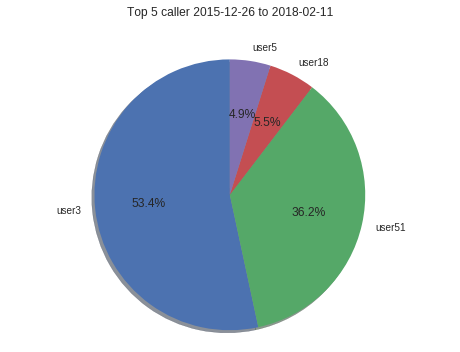

,contact_name,num_count
3,user3,704
51,user51,478
18,user18,73
5,user5,64
44,user44,54


In [17]:
df_sorted = df_num.sort_values(['num_count'],ascending =False)

plot_pie_chart(df_sorted.loc[:5,'contact_name'],df_sorted.loc[:5,'num_count'],"Top 5 caller 2015-12-26 to 2018-02-11")

display_text('Top 5 callers ')
df_sorted.head()

3


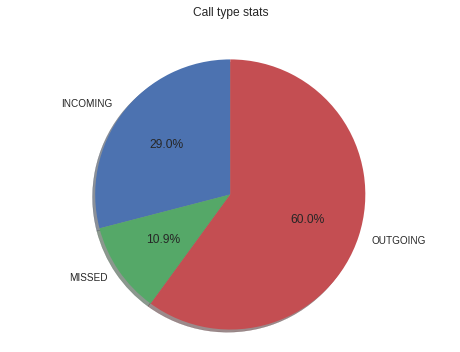

In [18]:
df_call = find_frequency_df(df_cleaned,['call_type'],'count_call_type')
plot_pie_chart(df_call['call_type'],df_call['count_call_type'],"Call type stats")

In [19]:
df_calls = find_frequency_df(df_cleaned,['contact_name','call_type'],'count')
update_user(df_calls)

109


In [0]:
from wordcloud import WordCloud
def plot_word_cloud(df_words):
  words ={}
  for i in range(0,len(df_words)):
    w= df_words.iloc[i]['contact_name']
    w = w.replace(' ','_')
    words[w] = df_words.iloc[i]['count']
  wordcloud = WordCloud(background_color ='black',min_font_size=10).generate_from_frequencies(words)
  #wordcloud.generate_from_frequencies(frequencies=d)
  plt.figure(figsize=(8,8),facecolor=None)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()

In [0]:
#!pip install wordcloud
def call_stats(df_temp,call_type):
  df_call = df_temp.loc[df_temp['call_type'] == call_type]
  display_text("Top 5 people who gives "+call_type+ ' calls')
  print((df_call.sort_values(['count'],ascending = False)).head())
  display_text("Bar chart of "+call_type+" calls")
  plot_bar_chart(len(df_call),df_call['count'],df_call['contact_name'],call_type +" stats","Contact Name","Count",rotation=90)
  display_text("Word Cloud of "+call_type+" calls")
  plot_word_cloud(df_call)
  
  

   contact_name call_type  count
6         user6    MISSED     82
97       user97    MISSED     55
10       user10    MISSED     12
15       user15    MISSED      8
56       user56    MISSED      8


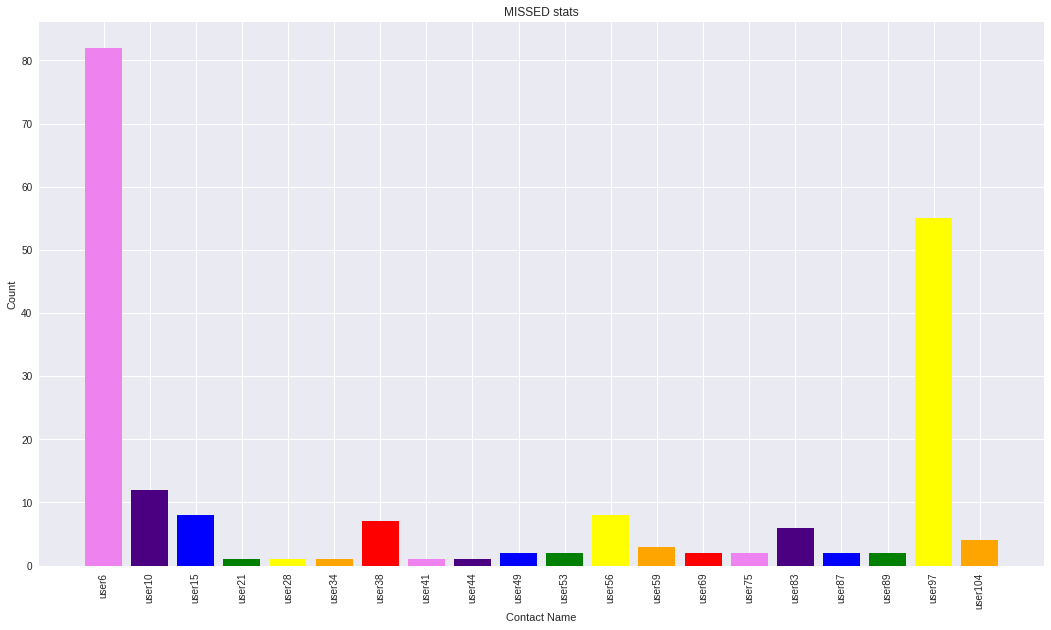

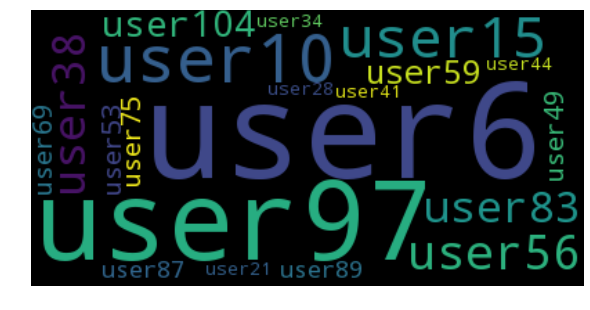

In [25]:
#Who gives more miss call
call_stats(df_calls,'MISSED')


   contact_name call_type  count
5         user5  INCOMING    200
96       user96  INCOMING    170
9         user9  INCOMING     20
48       user48  INCOMING     17
68       user68  INCOMING     15


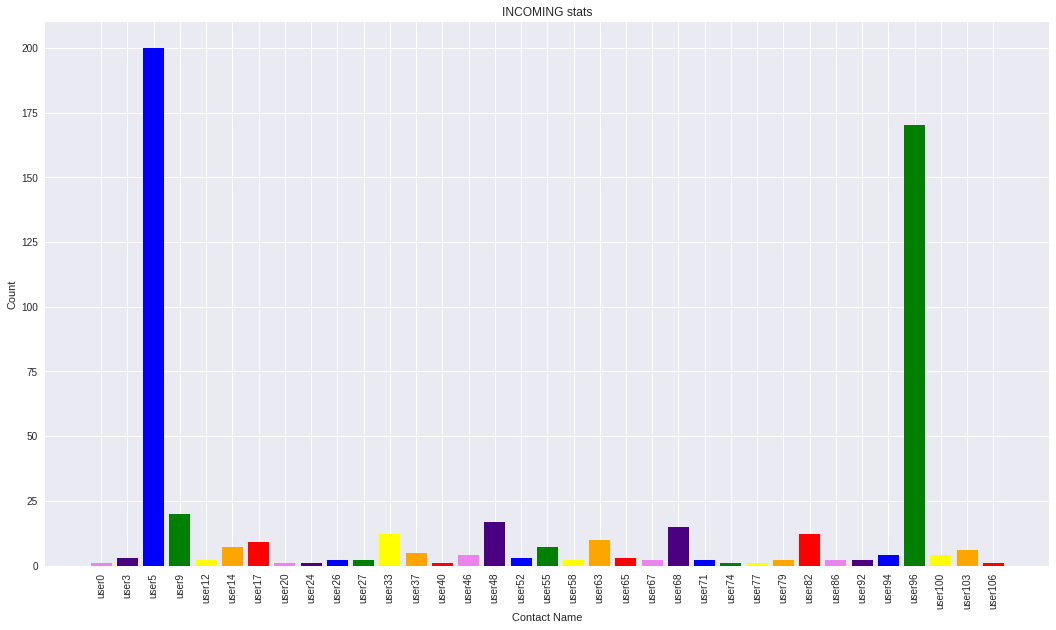

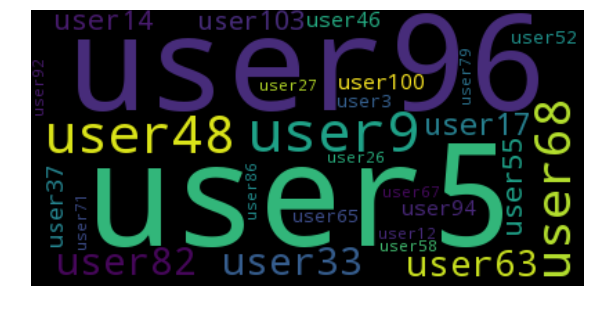

In [26]:
call_stats(df_calls,'INCOMING')

   contact_name call_type  count
7         user7  OUTGOING    422
98       user98  OUTGOING    253
35       user35  OUTGOING     60
84       user84  OUTGOING     36
70       user70  OUTGOING     36


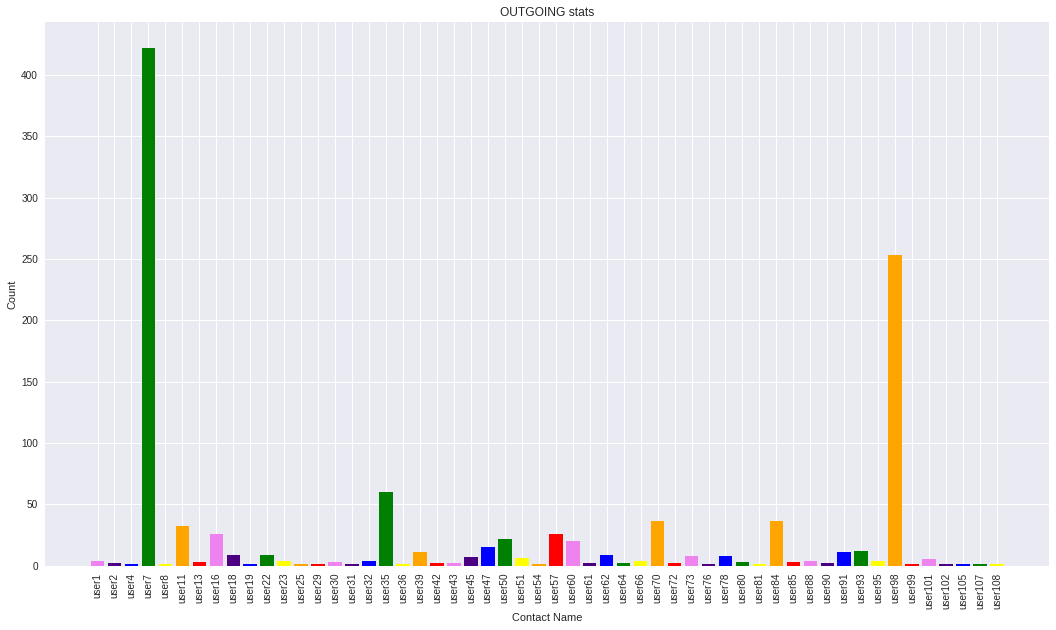

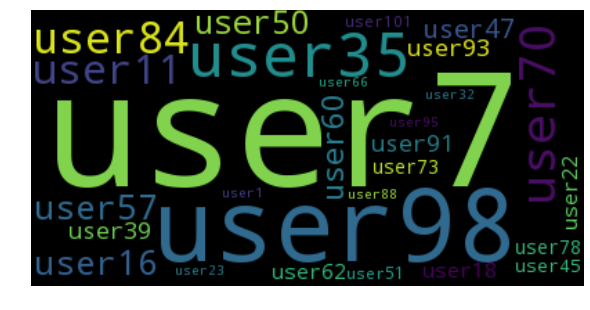

In [27]:
call_stats(df_calls,'OUTGOING')

In [0]:
#df_out_duration = df_cleaned.loc[df_cleaned['call_type'] == 'OUTGOING'].groupby('contact_name')['duration'].sum().sort_values(ascending=False)
#display_text("Looks like you like talking with "+str(df_out_duration[0]))

In [0]:
date =[]
for x in df_cleaned['start_timestamp']:
  spl = x.split(' ')[0].split('-')
  date.append(spl[0]+'-'+spl[1])
#df_cleaned['date'] = date
df_month = df_cleaned.assign(date = date)

In [30]:
df_month = find_frequency_df(df_month,['date'],'count')


8


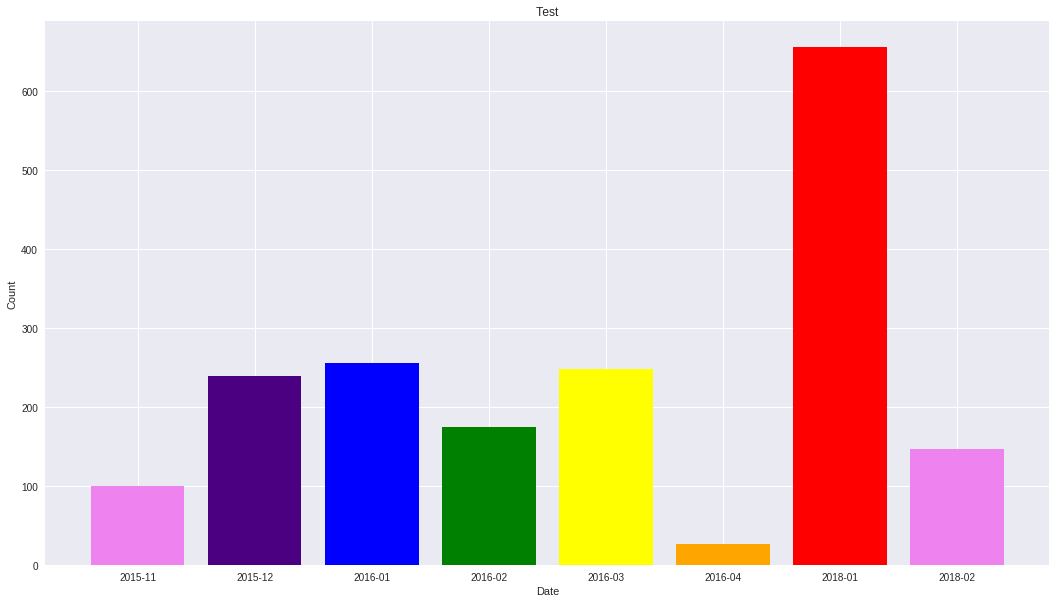

In [31]:
plot_bar_chart(len(df_month),df_month['count'],df_month['date'],"Test",'Date','Count',rotation=0)